DATA CLEANING

In [188]:
import pandas as pd

In [189]:
df1 = pd.read_csv("customers.csv")
df1["signup_date"] = pd.to_datetime(df1["signup_date"], errors="coerce")
median_age = df1['age'].median()
# Fill null values with the calculated median
df1['age'] = df1['age'].fillna(median_age)

# Finally, ensure the column is an integer type
df1['age'] = df1['age'].astype(int)
print(median_age)

duplicate_products = df1[df1.duplicated(subset=["customer_id"], keep=False)]
print("Duplicate customer_ids:\n", duplicate_products)
# 2. Remove duplicates (keep only first occurrence)
df1 = df1.drop_duplicates(subset=["customer_id"], keep="first")
# 3. Verify
print("Remaining duplicates:", df1.duplicated(subset=["customer_id"]).sum())

44.0
Duplicate customer_ids:
     customer_id first_name   last_name  gender  age signup_date region
59        C0059     Alison      Berger    Male   56  2020-11-16   West
135       C0135     Hector      Clarke   Other   30  2025-04-04   East
179       C0179      Carol        Lara  Female   42  2021-10-03  North
373       C0373    Melissa        Cole  Female   66  2020-10-10  North
396       C0396      Laura       Smith  Female   67  2025-03-10  South
476       C0476       John          Le  Female   29  2022-11-23   West
480       C0480    Matthew       Moore  Female   27  2020-05-23  South
515       C0515  Elizabeth     Alvarez   Other   46  2023-07-22   East
526       C0526    Michael       Brown   Other   25  2021-08-09   East
572       C0572    Abigail       Adams    Male   21  2020-04-20   West
596       C0596      David        Carr  Female   18  2022-08-22  South
600       C0600    Timothy  Cunningham    Male   39  2021-04-24  South
631       C0631   Kimberly       Woods    Male 

In [190]:
df2 = pd.read_csv("returns.csv")
df2["return_date"] = pd.to_datetime(df2["return_date"], errors="coerce")
df2.dropna(inplace=True)
duplicate_products = df2[df2.duplicated(subset=["return_id"], keep=False)]
print("Duplicate customer_ids:\n", duplicate_products)

# 2. Remove duplicates (keep only first occurrence)
df2 = df2.drop_duplicates(subset=["return_id"], keep="first")

# 3. Verify
print("Remaining duplicates:", df2.duplicated(subset=["return_id"]).sum())

Duplicate customer_ids:
     return_id order_id return_date     return_reason
35      R0035   O02071  2023-08-10         Defective
156     R0156   O01596  2024-01-27  No Longer Needed
182     R0182   O00585  2024-08-24     Late Delivery
194     R0194   O00934  2024-09-09        Wrong Item
200     R0182   O00585  2024-08-24     Late Delivery
201     R0156   O01596  2024-01-27  No Longer Needed
202     R0194   O00934  2024-09-09        Wrong Item
203     R0035   O02071  2023-08-10         Defective
Remaining duplicates: 0


In [191]:
df3 = pd.read_csv("sales_data.csv")
df3["order_date"] = pd.to_datetime(df3["order_date"], errors="coerce")
df3['store_id'] = df3['store_id'].fillna('0')
duplicate_products = df3[df3.duplicated(subset=["order_id"], keep=False)]
#print("Duplicate order_ids:\n", duplicate_products)

duplicate_products = df3[df3.duplicated(subset=["product_id"], keep=False)]

# Count how many times each duplicate order_id appears
duplicate_counts = duplicate_products.groupby("product_id").size().reset_index(name="count")

print("Duplicate product_ids with counts:\n", duplicate_counts)


duplicate_products = df3[df3.duplicated(subset=["product_id"], keep=False)]
print("Duplicate product_ids:\n", duplicate_products)


# 2. Remove duplicates (keep only first occurrence)
df3 = df3.drop_duplicates(subset=["order_id"], keep="first")

# 3. Verify
print("Remaining duplicates:", df3.duplicated(subset=["order_id"]).sum())

df3.head()

Duplicate product_ids with counts:
     product_id  count
0        P0000      5
1        P0001      3
2        P0004      2
3        P0005      2
4        P0006      6
..         ...    ...
852      P1194      4
853      P1195      4
854      P1196      3
855      P1197      3
856      P1199      2

[857 rows x 2 columns]
Duplicate product_ids:
      order_id order_date customer_id product_id store_id sales_channel  \
0      O00000 2024-01-31       C0125      P1086        0        Online   
1      O00001 2024-09-29       C0633      P0973     S042      In-Store   
2      O00002 2023-08-29       C0653      P0659        0        Online   
3      O00003 2024-05-13       C0753      P0666     S014      In-Store   
4      O00004 2024-07-22       C0627      P0166     S017      In-Store   
...       ...        ...         ...        ...      ...           ...   
3055   O02044 2024-09-26       C0580      P0886     S024      In-Store   
3056   O02352 2023-11-16       C0632      P0091     S034    

,order_id,order_date,customer_id,product_id,store_id,sales_channel,quantity,unit_price,discount_pct,total_amount
0,O00000,2024-01-31,C0125,P1086,0,Online,2,80.63,0.05,153.20
1,O00001,2024-09-29,C0633,P0973,S042,In-Store,20,209.16,0.05,3974.00
2,O00002,2023-08-29,C0653,P0659,0,Online,2,218.60,0.10,393.48
3,O00003,2024-05-13,C0753,P0666,S014,In-Store,1,78.53,0.20,62.82
4,O00004,2024-07-22,C0627,P0166,S017,In-Store,1,344.93,0.20,275.94


In [192]:
df4 = pd.read_csv("stores.csv")
df4.dropna(inplace=True)
duplicate_ids = df4[df4.duplicated(subset=["store_id"], keep=False)]
print("Duplicate store_ids:\n", duplicate_ids)
df4 = df4.drop_duplicates(subset=["store_id"], keep="first")

# 3. Verify no duplicates remain
print("Remaining duplicates:", df4.duplicated(subset=["store_id"]).sum())

Duplicate store_ids:
    store_id          store_name store_type region     city  operating_cost
17     S017  Robinson PLC Store   Flagship   East  Phoenix        47603.84
60     S017  Robinson PLC Store   Flagship   East  Phoenix        47603.84
Remaining duplicates: 0


In [193]:
import pandas as pd

df5 = pd.read_csv("products.csv")

# --- Step 1: Sold units ---
sold_stats = (
    df3.groupby("product_id")["quantity"]
    .sum()
    .reset_index(name="sold_units")
)

# --- Step 2: Returns ---
# Merge returns (df2) with order details (df3) to link order_id → product_id + quantity
returns_merged = df2.merge(df3, on="order_id", how="inner")

# Derive return units (no return_orders now)
return_stats = (
    returns_merged
    .groupby("product_id")
    .agg(
        return_quantity=("quantity", "sum")   # total returned units
    )
    .reset_index()
)

# --- Step 3: Merge everything into products ---
df5["product_id"] = df5["product_id"].astype(str)
sold_stats["product_id"] = sold_stats["product_id"].astype(str)
return_stats["product_id"] = return_stats["product_id"].astype(str)

df5 = df5.merge(sold_stats, on="product_id", how="left")
df5 = df5.merge(return_stats, on="product_id", how="left")

# Fill missing values → 0
df5[["sold_units", "return_quantity"]] = (
    df5[["sold_units", "return_quantity"]].fillna(0).astype(int)
)

# --- Step 4: Return Rate (ratio, not %)
df5["return_rate"] = (
    df5["return_quantity"] / df5["sold_units"].replace(0, pd.NA)
).fillna(0).round(4)
duplicate_products = df5[df5.duplicated(subset=["product_id"], keep=False)]
#print("Duplicate product_ids:\n", duplicate_products)
df5 = df5.drop_duplicates(subset=["product_id"], keep="first")

# 3. Verify
print("Remaining duplicates:", df5.duplicated(subset=["product_id"]).sum())

df5['brand'] = df5['brand'].fillna("Unknown")

# (Optional) Check how many mismatches exist between brand col & product_name
df5['brand_in_name'] = df5['product_name'].str.split().str[0]
mismatch = df5[df5['brand'] != df5['brand_in_name']]

print("Mismatched rows between brand column and product_name:")
print(mismatch[['product_id', 'product_name', 'brand']].head(100))



Remaining duplicates: 0
Mismatched rows between brand column and product_name:
    product_id           product_name   brand
0        P0000        BrandA Shoulder  BrandC
1        P0001  BrandA Responsibility  BrandD
4        P0004          BrandA Indeed  BrandD
5        P0005             BrandC Cut  BrandA
6        P0006             BrandC Air  BrandA
..         ...                    ...     ...
115      P0115           BrandC Piece  BrandD
116      P0116       BrandC Sometimes  BrandB
118      P0118         BrandC Manager  BrandD
119      P0119           BrandB Quite  BrandC
120      P0120             BrandC Arm  BrandB

[100 rows x 3 columns]


C:\Users\venkat\AppData\Local\Temp\ipykernel_31268\2539961320.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0).round(4)


In [194]:
df1.to_csv("customers_cleaned.csv", index=False)
df2.to_csv("returns_cleaned.csv", index=False)
df3.to_csv("sales_data_cleaned.csv", index=False)
df4.to_csv("stores_cleaned.csv", index=False)
df5.to_csv("products_cleaned.csv", index=False)

In [195]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  800 non-null    object        
 1   first_name   800 non-null    object        
 2   last_name    800 non-null    object        
 3   gender       800 non-null    object        
 4   age          800 non-null    int64         
 5   signup_date  800 non-null    datetime64[ns]
 6   region       800 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 50.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   return_id      200 non-null    object        
 1   order_id       200 non-null    object        
 2   return_date    200 non-null    datetime64[ns]
 3   return_reason  200 non-null    

In [196]:
df3["total_amount"] = df3.mean(numeric_only=True).mean()
print(df3)

     order_id order_date customer_id product_id store_id sales_channel  \
0      O00000 2024-01-31       C0125      P1086        0        Online   
1      O00001 2024-09-29       C0633      P0973     S042      In-Store   
2      O00002 2023-08-29       C0653      P0659        0        Online   
3      O00003 2024-05-13       C0753      P0666     S014      In-Store   
4      O00004 2024-07-22       C0627      P0166     S017      In-Store   
...       ...        ...         ...        ...      ...           ...   
2995   O02995 2025-03-09       C0346      P0972        0        Online   
2996   O02996 2024-11-10       C0714      P0856     S047      In-Store   
2997   O02997 2024-08-18       C0217      P0586     S021      In-Store   
2998   O02998 2023-11-11       C0591      P0053     S006      In-Store   
2999   O02999 2025-03-09       C0150      P0606     S037      In-Store   

      quantity  unit_price  discount_pct  total_amount  
0            2       80.63          0.05    108.802193

In [197]:
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())
print(df4.isnull().sum())
print(df5.isnull().sum())

customer_id    0
first_name     0
last_name      0
gender         0
age            0
signup_date    0
region         0
dtype: int64
return_id        0
order_id         0
return_date      0
return_reason    0
dtype: int64
order_id         0
order_date       0
customer_id      0
product_id       0
store_id         0
sales_channel    0
quantity         0
unit_price       0
discount_pct     0
total_amount     0
dtype: int64
store_id          0
store_name        0
store_type        0
region            0
city              0
operating_cost    0
dtype: int64
product_id         0
product_name       0
category           0
brand              0
cost_price         0
unit_price         0
margin_pct         0
sold_units         0
return_quantity    0
return_rate        0
brand_in_name      0
dtype: int64


EDA

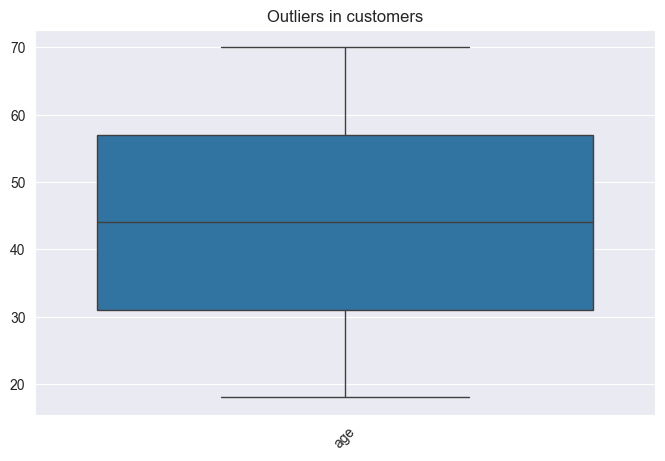

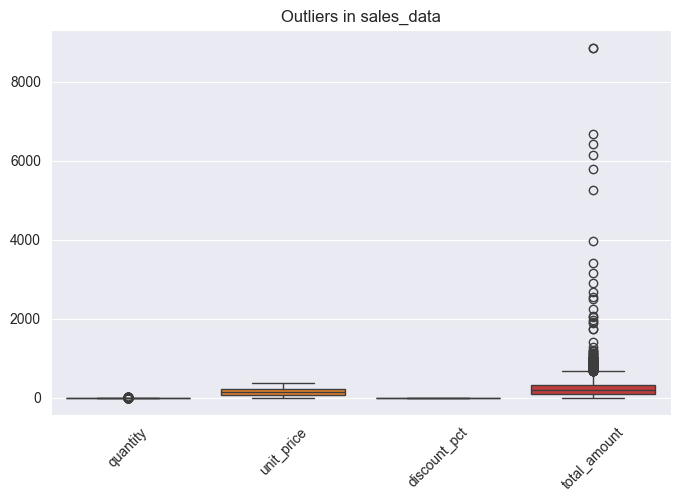

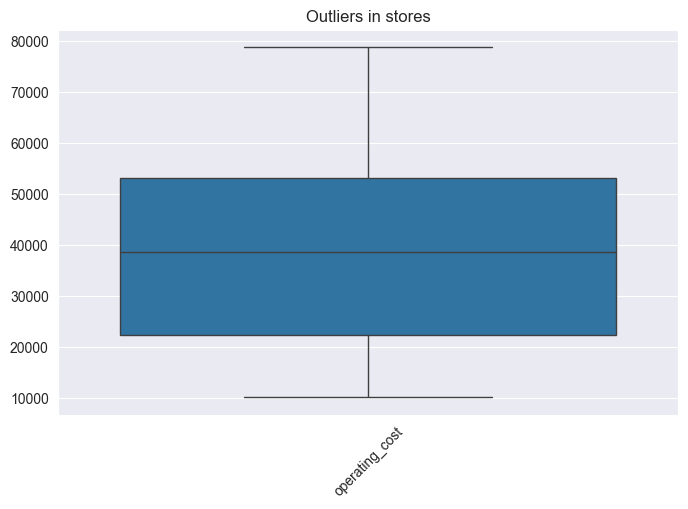

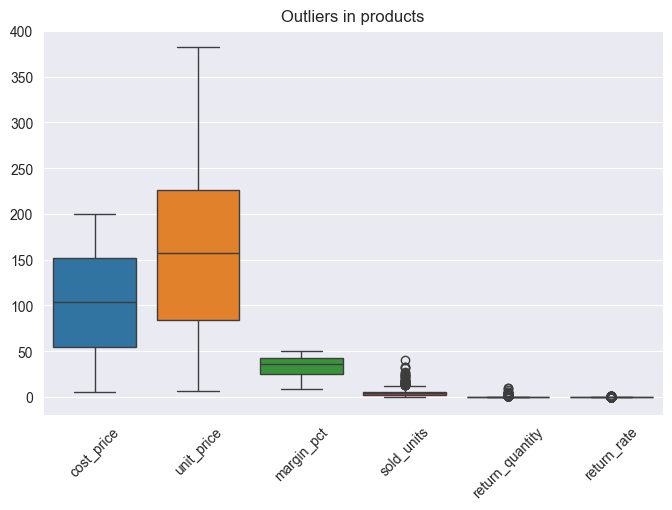

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df11 = pd.read_csv("customers_cleaned.csv")
df22 = pd.read_csv("returns_cleaned.csv")
df33 = pd.read_csv("sales_data_cleaned.csv")
df44 = pd.read_csv("stores_cleaned.csv")
df55 = pd.read_csv("products_cleaned.csv")

dfs = {
    "customers": df11,
    "returns": df22,
    "sales_data": df33,
    "stores": df44,
    "products": df55
}

for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=["number"]).columns
    if not numeric_cols.empty:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df[numeric_cols])
        plt.title(f"Outliers in {name}")
        plt.xticks(rotation=45)
        plt.show()


In [199]:
df22.describe()

,return_id,order_id,return_date,return_reason
count,200,200,200,200
unique,200,193,176,4
top,R0000,O00362,2023-08-10,Defective
freq,1,3,3,63


In [200]:
#adding profit column
df55["profit"] = (df55["unit_price"] - df55["cost_price"]).round(2)
print(df5.head())

  product_id           product_name     category   brand  cost_price  \
0      P0000        BrandA Shoulder  Electronics  BrandC       52.75   
1      P0001  BrandA Responsibility  Electronics  BrandD       11.20   
2      P0002           BrandB Small  Electronics  BrandB      144.62   
3      P0003        BrandD Continue      Apparel  BrandD      119.91   
4      P0004          BrandA Indeed      Apparel  BrandD       71.35   

   unit_price  margin_pct  sold_units  return_quantity  return_rate  \
0       64.65       18.41           9                3       0.3333   
1       13.26       15.54           4                0       0.0000   
2      250.37       42.24           0                0       0.0000   
3      219.25       45.31           0                0       0.0000   
4       88.47       19.35           5                0       0.0000   

  brand_in_name  
0        BrandA  
1        BrandA  
2        BrandB  
3        BrandD  
4        BrandA  


In [201]:
#adding age_group column
def age_group(age):
    if age <= 17:
        return "Teen"
    elif age <= 25:
        return "Young Adult"
    elif age <= 35:
        return "Adult"
    elif age <= 50:
        return "Middle-aged"
    else:
        return "Senior"

df11["age_group"] = df11["age"].apply(age_group)
df11.head()


,customer_id,first_name,last_name,gender,age,signup_date,region,age_group
0,C0000,Patrick,Morgan,Male,18,2024-07-11,South,Young Adult
1,C0001,Eric,Lee,Other,36,2020-09-20,East,Middle-aged
2,C0002,Thomas,Pena,Female,44,2021-03-07,East,Middle-aged
3,C0003,Dalton,Duran,Male,24,2021-08-29,South,Young Adult
4,C0004,Travis,Mcclain,Male,50,2023-03-29,South,Middle-aged


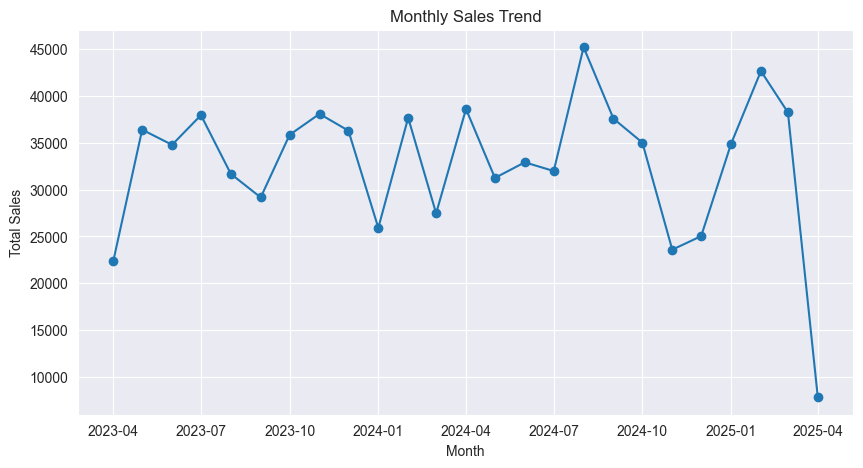

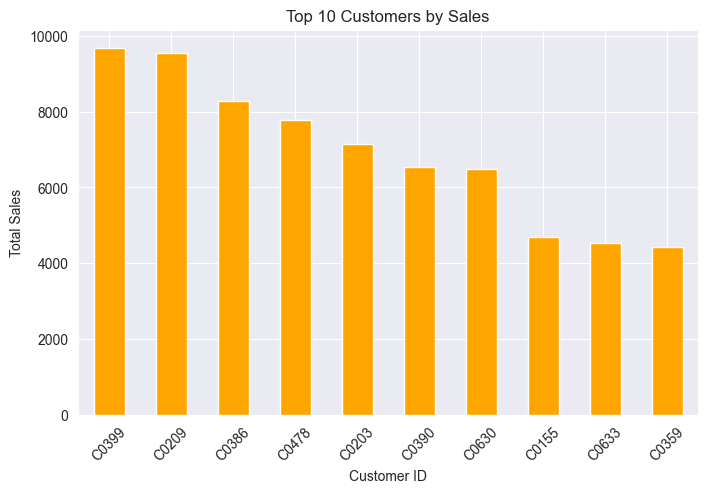

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

df33["order_date"] = pd.to_datetime(df33["order_date"], errors="coerce")

# ---- Sales Trend ----
sales_trend = df33.groupby(df3["order_date"].dt.to_period("M"))["total_amount"].sum().reset_index()
sales_trend["order_date"] = sales_trend["order_date"].dt.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(sales_trend["order_date"], sales_trend["total_amount"], marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# ---- Top Customers ----
top_customers = df33.groupby("customer_id")["total_amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_customers.plot(kind="bar", color="orange")
plt.title("Top 10 Customers by Sales")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()



In [203]:
# Saving cleaned dataframes to new CSVs
df11.to_csv("customers_cleaned1.csv", index=False)
df22.to_csv("returns_cleaned1.csv", index=False)
df33.to_csv("sales_data_cleaned1.csv", index=False)
df44.to_csv("stores_cleaned1.csv", index=False)
df55.to_csv("products_cleaned1.csv", index=False)